# Dataset overview

In [1]:
# Cell setup (thêm vào đầu notebook nếu chưa có)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Đọc dữ liệu
df = pd.read_csv('../data/raw/student-combine.csv')

# Numerical Columns Analysis

--- BẢNG THỐNG KÊ MÔ TẢ & HÌNH DÁNG PHÂN PHỐI ---


,Mean,Median,Std Dev,Skewness,Distribution Shape
age,16.726054,17.0,1.239975,0.434028,Symmetrical (Normal-like)
Medu,2.603448,3.0,1.124907,-0.139528,Symmetrical (Normal-like)
Fedu,2.387931,2.0,1.099938,0.119447,Symmetrical (Normal-like)
traveltime,1.522989,1.0,0.731727,1.369314,Right Skewed (Positively)
studytime,1.970307,2.0,0.834353,0.670982,Right Skewed (Positively)
failures,0.264368,0.0,0.656142,2.783660,Right Skewed (Positively)
famrel,3.935824,4.0,0.933401,-1.055775,Left Skewed (Negatively)
freetime,3.201149,3.0,1.031507,-0.178707,Symmetrical (Normal-like)
goout,3.156130,3.0,1.152575,0.038928,Symmetrical (Normal-like)
Dalc,1.494253,1.0,0.911714,2.157973,Right Skewed (Positively)


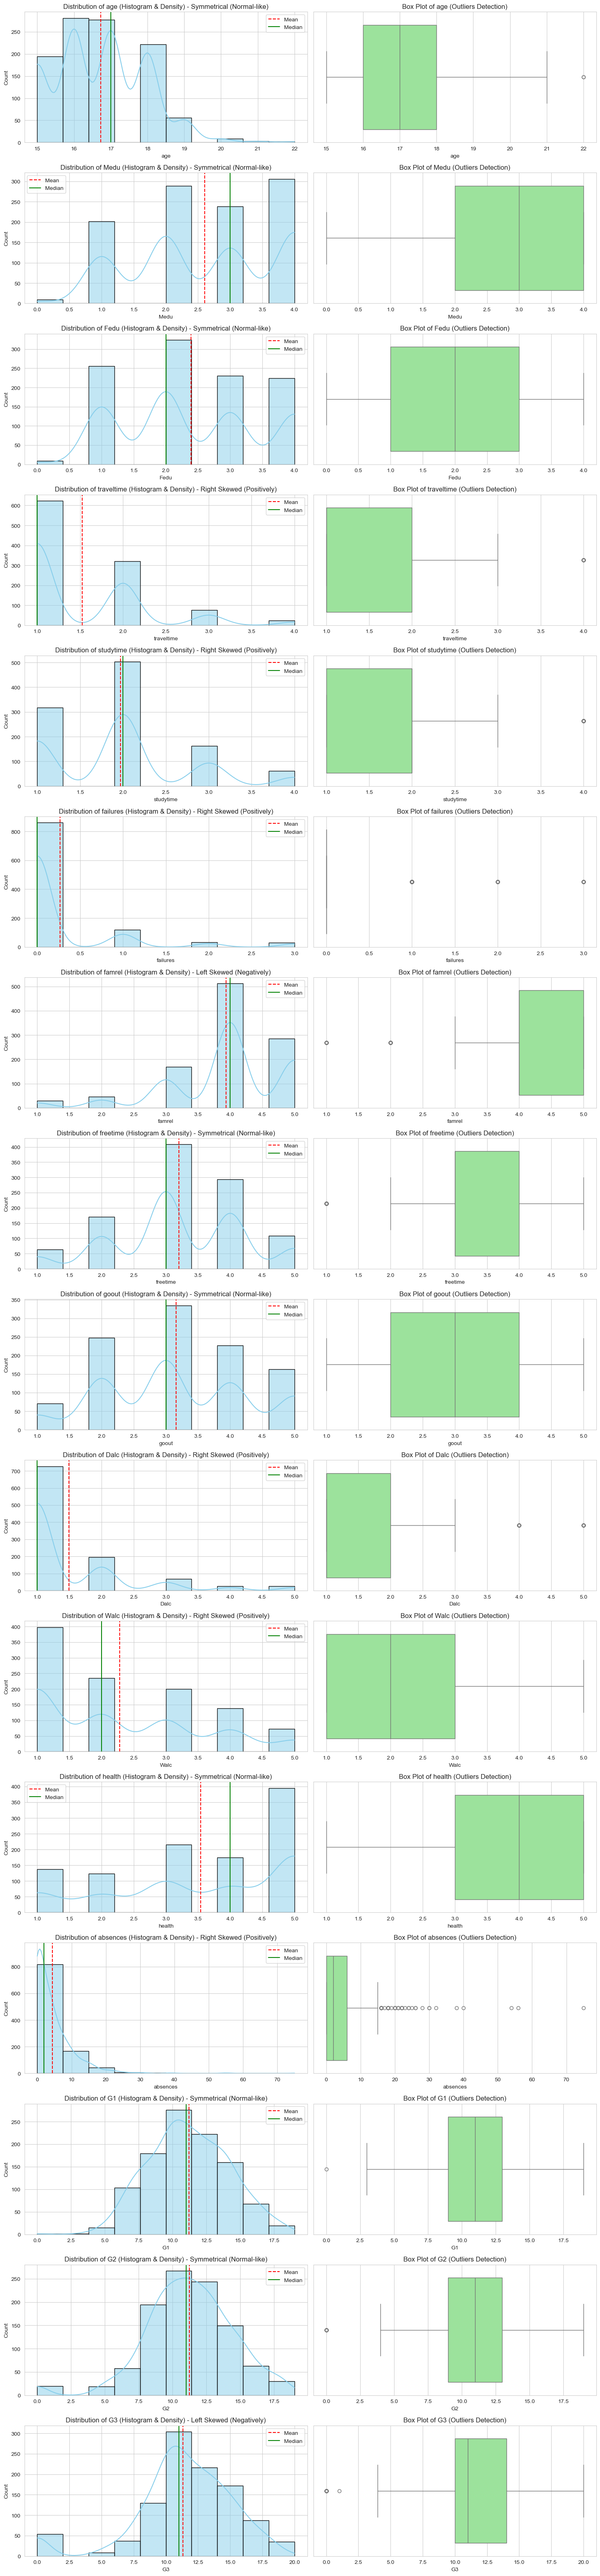

In [6]:
'''
Distribution & Central Tendency:
• What is the distribution shape? (normal, skewed, bimodal, uniform)
• Create visualizations: histograms, box plots, density plots,…
• Calculate: mean, median, standard deviation
'''
# Chọn các cột số quan trọng để phân tích
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


# Tính toán Central Tendency (Mean, Median, Std) & Shape (Skewness)
stats_summary = df[numeric_cols].agg(['mean', 'median', 'std', 'skew']).T
stats_summary.columns = ['Mean', 'Median', 'Std Dev', 'Skewness']

# Hàm xác định hình dáng phân phối dựa trên Skewness
def determine_shape(skew_val):
    if -0.5 <= skew_val <= 0.5:
        return "Symmetrical (Normal-like)"  # Đối xứng (Gần chuẩn)
    elif skew_val > 0.5:
        return "Right Skewed (Positively)"  # Lệch phải
    else:
        return "Left Skewed (Negatively)"   # Lệch trái

stats_summary['Distribution Shape'] = stats_summary['Skewness'].apply(determine_shape)

print("--- BẢNG THỐNG KÊ MÔ TẢ & HÌNH DÁNG PHÂN PHỐI ---")
display(stats_summary)

# Trực quan hóa (Visualizations) kèm Distribution Shape
# Vẽ Histogram (kèm Density Plot) và Box Plot cho từng biến
plt.figure(figsize=(15, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Histogram & Density Plot
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Distribution of {col} (Histogram & Density) - {stats_summary.loc[col, "Distribution Shape"]}')
    plt.legend()
    
    # Box Plot
    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col} (Outliers Detection)')

plt.tight_layout()
plt.show()



In [7]:
# Lọc ra những cột bị lệch kèm distrubution shape
right_skewed_cols = stats_summary[stats_summary['Distribution Shape'] == "Right Skewed"].index.tolist()
print(f"Các cột bị lệch: {right_skewed_cols}")
print(stats_summary.loc[right_skewed_cols, ['Distribution Shape']])

Các cột bị lệch: []
Empty DataFrame
Columns: [Distribution Shape]
Index: []


Dựa vào kết quả trực quan, những cột cần chuyển đổi độ lệch là:
- **Thời gian học (`studytime`)** - Right Skewed: Đa số học ít giờ, ít học sinh học nhiều giờ
- **Vắng mặt (`absences`)** - Right Skewed: Đa số vắng ít, ít học sinh vắng nhiều
- **famrel** - Right Skewed: Đa số học sinh có gia đình không làm nông, ít học sinh có gia đình làm nông
- **Thời gian du lịch (`traveltime`)** - Right Skewed: Đa số học sinh có thời gian đi lại ngắn, ít học sinh có thời gian đi lại dài
- **Lần rớt môn trước (`failures`)** - Right Skewed: Đa số học sinh không rớt, ít học sinh rớt nhiều lần
- **Dalc và Walc (`Dalc`, `Walc`)** - Right Skewed: Đa số học sinh uống ít, ít học sinh uống nhiều
- **(`famrel`)** - Left Skewed nhẹ: Đa số học sinh có gia đình làm nông, ít học sinh có gia đình không làm nông
- **Điểm G3 (`G3`)** - Left Skewed nhẹ: Đa số điểm cao, ít học sinh điểm thấp

In [8]:
'''
Range & Outliers:
• What are the minimum and maximum values?
• Are min/max values reasonable, or do they indicate errors?
• Identify outliers using box plots, IQR method, or z-scores
• Are outliers genuine extreme values or data entry errors?
'''
# 1. Range Analysis: Min & Max Values
# Tính toán min/max cho các cột số
range_df = df[numeric_cols].agg(['min', 'max']).T

# Thêm cột kiểm tra tính hợp lý (Logic check) thủ công
# Dựa trên mô tả dataset: Grades (0-20), Age (15-22), các thang đo (1-4 hoặc 1-5)
range_df['Reasonable?'] = 'Check Required' 
# (Bạn có thể tự đánh giá dựa trên in ra bên dưới)

print("--- BẢNG GIÁ TRỊ TỐI THIỂU & TỐI ĐA ---")
display(range_df)

# 2. Outlier Detection using IQR Method
# Hàm phát hiện outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound, outliers[column].unique()

# Áp dụng cho các cột quan trọng
focus_outliers = ['age', 'absences', 'G3', 'traveltime', 'studytime']

print("\n--- PHÂN TÍCH GIÁ TRỊ NGOẠI LAI (OUTLIERS) ---")
print(f"{'Column':<12} | {'Count':<6} | {'Bounds (Min-Max)':<20} | {'Extreme Values Found'}")
print("-" * 80)

for col in focus_outliers:
    count, lower, upper, unique_outliers = detect_outliers_iqr(df, col)
    bounds = f"{lower:.1f} to {upper:.1f}"
    # Chỉ hiển thị vài giá trị outlier đại diện
    outlier_str = str(sorted(unique_outliers)) if len(unique_outliers) < 10 else str(sorted(unique_outliers)[:5]) + "..."
    print(f"{col:<12} | {count:<6} | {bounds:<20} | {outlier_str}")



--- BẢNG GIÁ TRỊ TỐI THIỂU & TỐI ĐA ---


,min,max,Reasonable?
age,15,22,Check Required
Medu,0,4,Check Required
Fedu,0,4,Check Required
traveltime,1,4,Check Required
studytime,1,4,Check Required
failures,0,3,Check Required
famrel,1,5,Check Required
freetime,1,5,Check Required
goout,1,5,Check Required
Dalc,1,5,Check Required



--- PHÂN TÍCH GIÁ TRỊ NGOẠI LAI (OUTLIERS) ---
Column       | Count  | Bounds (Min-Max)     | Extreme Values Found
--------------------------------------------------------------------------------
age          | 2      | 13.0 to 21.0         | [22]
absences     | 54     | -9.0 to 15.0         | [16, 17, 18, 19, 20]...
G3           | 54     | 4.0 to 20.0          | [0, 1]
traveltime   | 24     | -0.5 to 3.5          | [4]
studytime    | 62     | -0.5 to 3.5          | [4]


**Nhận định**
1. Về điểm số (G3): Có 53 học sinh bị điểm 0.
   ->  Đây có thể không phải lỗi nhập liệu mà là học sinh bỏ thi hoặc rớt môn.
   -> Hành động: Cần xem xét mối quan hệ của nhóm này với số buổi vắng (absences).
   -> Trung bình số buổi vắng của nhóm điểm 0: 0.00
   -> Trung bình số buổi vắng của nhóm điểm > 0: 4.67
2. Về tuổi tác: Có 2 học sinh trên 21 tuổi (Max = 22).
   -> Nhận định: Hợp lý trong bối cảnh trường trung học (lưu ban hoặc đi học muộn), không phải lỗi.

Từ phần **Distribution & Central Tendency**, có thể xem xét chuyển đổi độ lệch (skewness) cho các biến: `famrel`, `studytime`, `absences`, `G3`, `traveltime`, `failures`, `Dalc`, `Walc` để cải thiện phân phối dữ liệu trước khi xây dựng mô hình dự đoán.

=> Thử sử dụng Log Transformation với các biến lệch phải và Power Transformations cho các biến lệch trái xem dữ liệu có cải thiện không

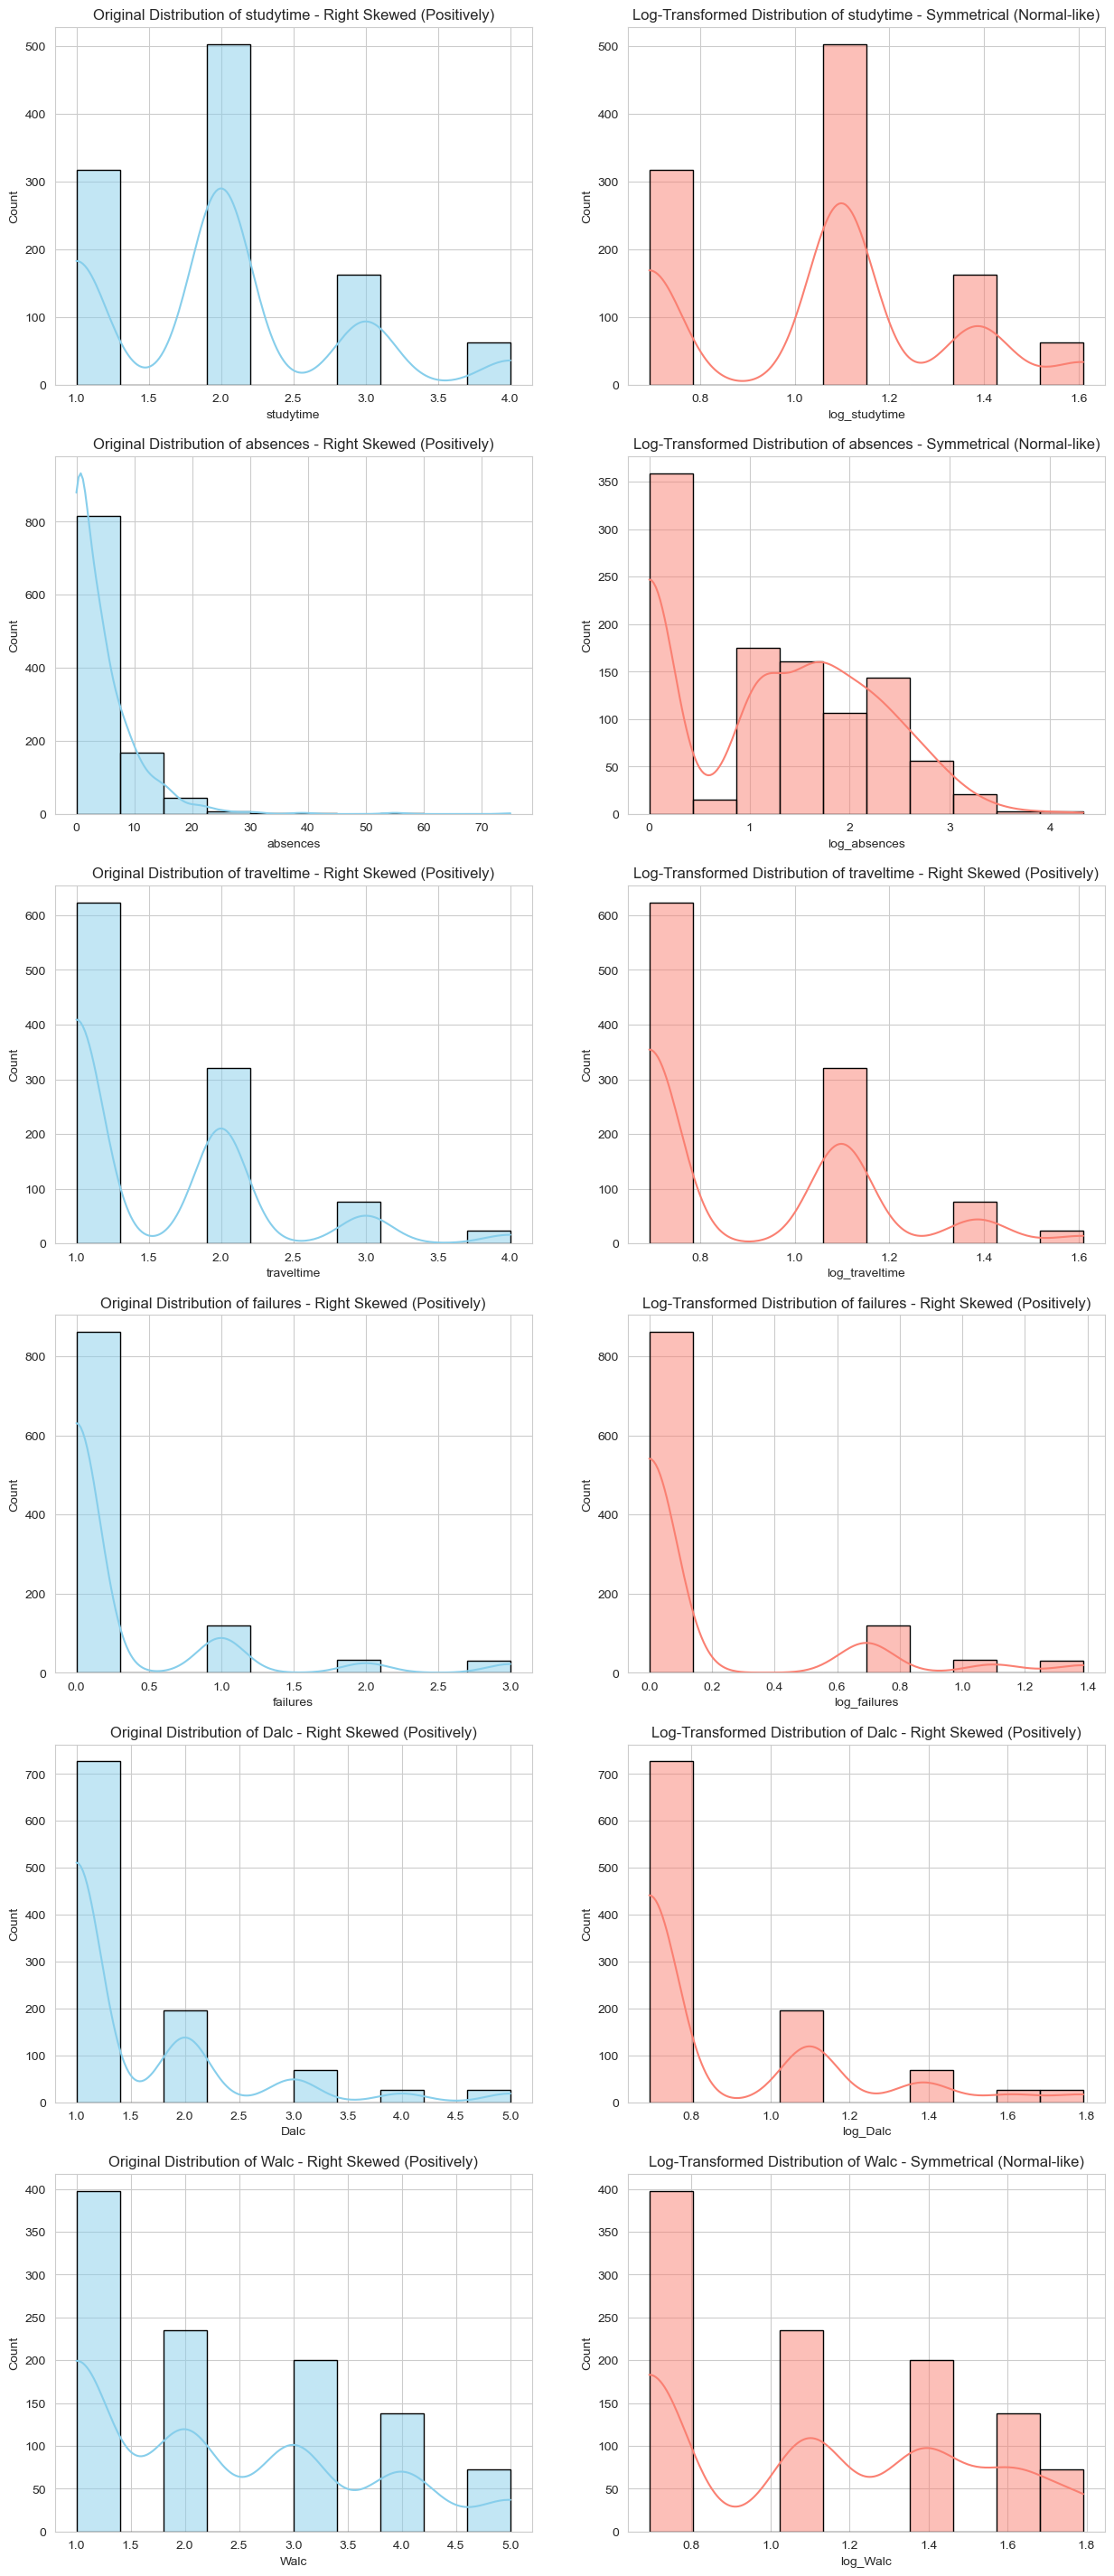

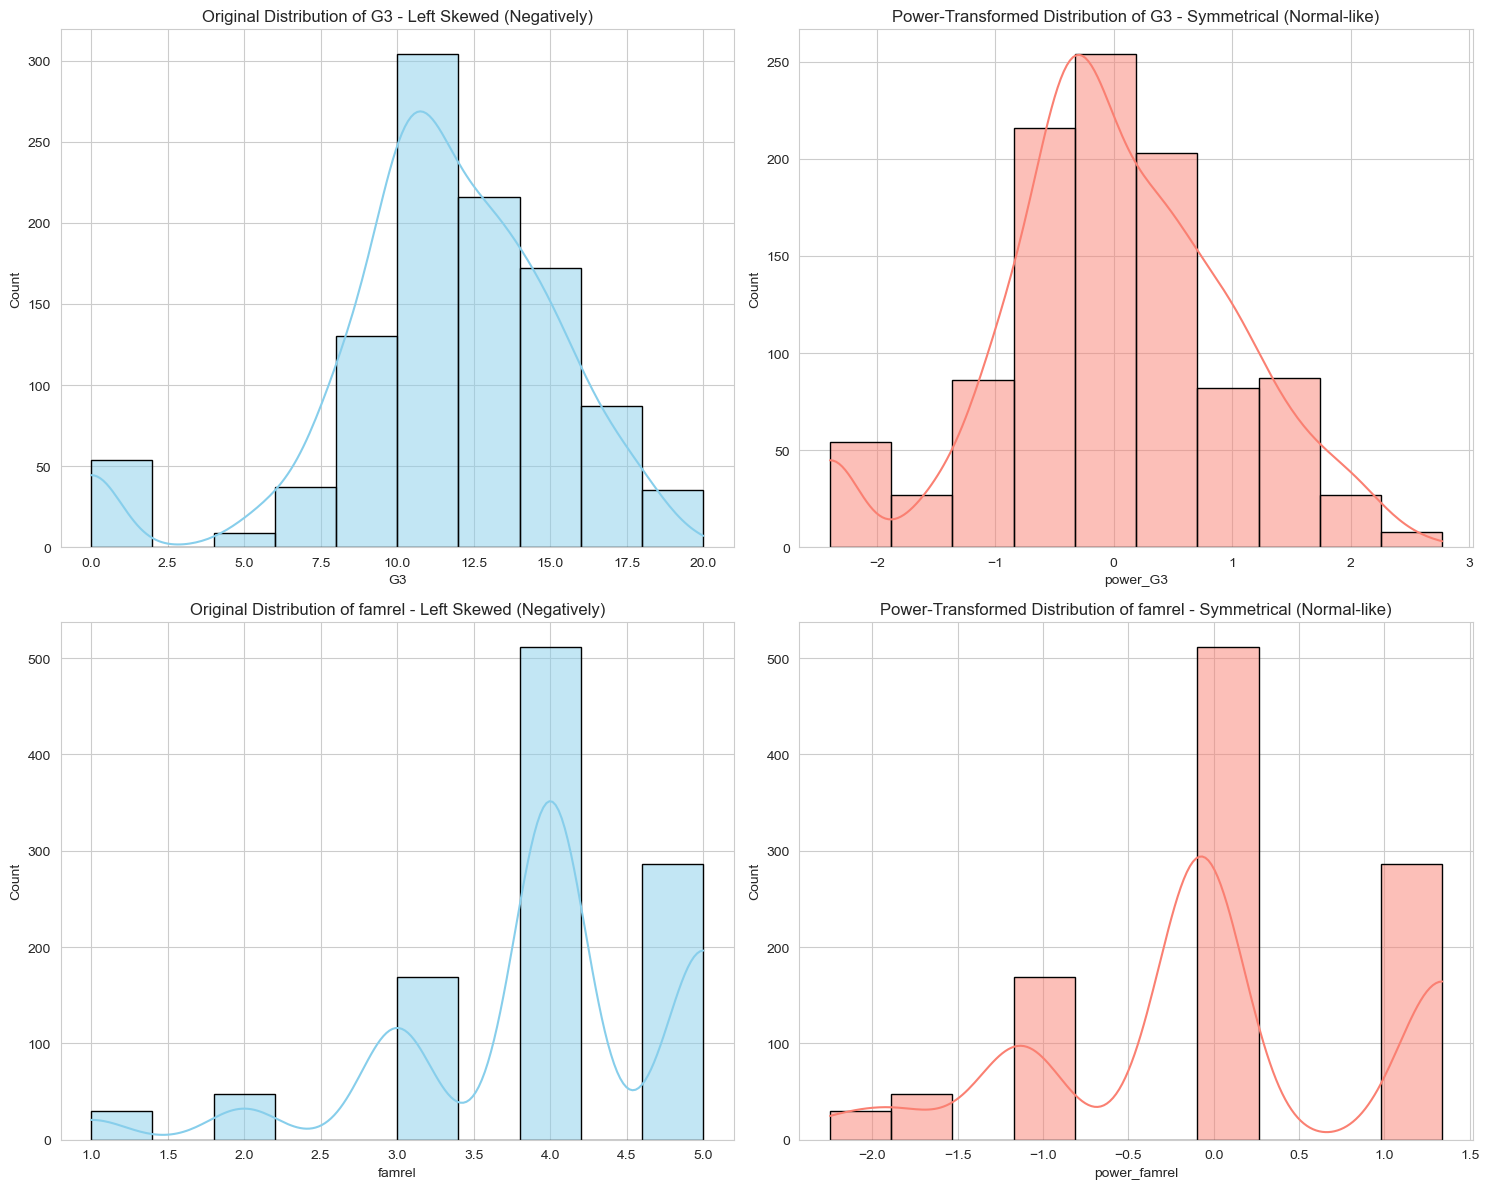

In [ ]:
# Sử dụng Log Transformation cho các cột bị lệch phải
log_cols = ['studytime', 'absences', 'traveltime', 'failures', 'Dalc', 'Walc']
for col in log_cols:
    df[f'log_{col}'] = np.log1p(df[col])  # Sử dụng log1p để tránh log(0)

# Sử dụng Power Transformation (Box-Cox) cho các cột bị lệch trái nếu cần thiết
power_cols = ['G3', 'famrel']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
for col in power_cols:
    # Box-Cox yêu cầu dữ liệu dương, nên cần kiểm tra và điều chỉnh nếu có giá trị <= 0
    if (df[col] <= 0).any():
        min_val = df[col].min()
        df[f'power_{col}'] = pt.fit_transform((df[col] - min_val + 1).values.reshape(-1, 1))
    else:
        df[f'power_{col}'] = pt.fit_transform(df[col].values.reshape(-1, 1))

# So sánh phân phối trước và sau khi chuyển đổi Log kèm chú thích Distribution Shape của cả hai
plt.figure(figsize=(15, 6 * len(log_cols)))
for i, col in enumerate(log_cols):
    # Phân phối ban đầu
    plt.subplot(len(log_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Original Distribution of {col} - {stats_summary.loc[col, "Distribution Shape"]}')
    
    # Phân phối sau Log Transformation
    plt.subplot(len(log_cols), 2, 2*i + 2)
    sns.histplot(df[f'log_{col}'], kde=True, bins=10, color='salmon', edgecolor='black')
    # Tính toán lại skewness sau log
    skew_after = df[f'log_{col}'].skew()
    shape_after = determine_shape(skew_after)
    plt.title(f'Log-Transformed Distribution of {col} - {shape_after}')

# So sánh phân phối trước và sau khi chuyển đổi Power kèm chú thích Distribution Shape của cả hai
plt.figure(figsize=(15, 6 * len(power_cols)))
for i, col in enumerate(power_cols):
    # Phân phối ban đầu
    plt.subplot(len(power_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Original Distribution of {col} - {stats_summary.loc[col, "Distribution Shape"]}')
    
    # Phân phối sau Power Transformation
    plt.subplot(len(power_cols), 2, 2*i + 2)
    sns.histplot(df[f'power_{col}'], kde=True, bins=10, color='salmon', edgecolor='black')
    # Tính toán lại skewness sau power transformation
    skew_after = df[f'power_{col}'].skew()
    shape_after = determine_shape(skew_after)
    plt.title(f'Power-Transformed Distribution of {col} - {shape_after}')
plt.tight_layout()
plt.show()


Sau khi Log Transformation và Power Transformation, ta nhận thấy các cột được cải thiện phân phối đáng kể, bao gồm: `studytime`, `absences`, `Walc`, `G3`, `famrel`.
- Các cột còn lại không thay đổi nhiều về phân phối.

=> Quyết định chỉ sử dụng Log Transformation cho các cột: `studytime`, `absences`, `Walc` và Power Transformation cho các cột: `G3`, `famrel` trong bước preprocessing sau này.

In [10]:
# Drop các cột tạm thời sau phân tích
drop_temp_cols = [f'log_{col}' for col in log_cols] + [f'power_{col}' for col in power_cols]
df.drop(columns=drop_temp_cols, inplace=True)

In [11]:
''' 
Data Quality:
• What percentage of values are missing?
• Are there any impossible values? (e.g., negative ages, prices = 0)
• Are there placeholder values? (e.g., 999, -1, 0 used to indicate missing)
'''
# 1. Missing Values Percentage
# Tính tỷ lệ % dữ liệu thiếu ở mỗi cột bằng cách trực quan biểu đồ
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Count': df.isnull().sum(), 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)
print("\n--- 1. TỶ LỆ % DỮ LIỆU THIẾU ---")
if missing_data.empty:
    print("Bộ dữ liệu không có giá trị NaN (Not a Number) nào.")
else:
    display(missing_data)

# 2. Impossible Values Check (Kiểm tra giá trị vô lý)
print("\n--- 2. KIỂM TRA GIÁ TRỊ VÔ LÝ (IMPOSSIBLE VALUES) ---")
impossible_issues = []

# Kiểm tra tuổi âm hoặc quá nhỏ/quá lớn
if (df['age'] < 0).any(): impossible_issues.append("Có tuổi âm!")
if (df['age'] > 22).any(): impossible_issues.append("Có học sinh > 22 tuổi (cần kiểm tra lại)")

# Kiểm tra thang điểm (0-20)
if ((df[['G1', 'G2', 'G3']] < 0) | (df[['G1', 'G2', 'G3']] > 20)).any().any():
    impossible_issues.append("Có điểm số nằm ngoài thang 0-20!")

# Kiểm tra các thang đo khảo sát (1-5)
scale_cols = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in scale_cols:
    if ((df[col] < 1) | (df[col] > 5)).any():
        impossible_issues.append(f"Cột {col} có giá trị nằm ngoài thang đo 1-5")

if not impossible_issues:
    print("Không phát hiện giá trị vô lý (Impossible Values) dựa trên luật kiểm tra.")
else:
    for issue in impossible_issues:
        print(f"- CẢNH BÁO: {issue}")

# 3. Placeholder Values Check (Giá trị giữ chỗ)
print("\n--- 3. KIỂM TRA GIÁ TRỊ GIỮ CHỖ (PLACEHOLDERS) ---")
# Kiểm tra các số thường dùng làm placeholder
placeholders = [-1, 99, 999]
numeric_cols = df.select_dtypes(include=['number']).columns
found_placeholder = False

for col in numeric_cols:
    for val in placeholders:
        count = (df[col] == val).sum()
        if count > 0:
            print(f"- Cột '{col}' chứa giá trị {val} ({count} lần) -> Có thể là placeholder?")
            found_placeholder = True

# Phân tích đặc biệt cho số 0
# Số 0 có ý nghĩa khác nhau tùy cột
zeros_check = df[numeric_cols].isin([0]).sum()
zeros_check = zeros_check[zeros_check > 0]
print("\nCác cột chứa giá trị 0 (Cần phân biệt giữa 'Zero thật' và 'Missing'):")
for col, count in zeros_check.items():
    print(f"- {col}: {count} dòng")

if not found_placeholder:
    print("\nKhông tìm thấy các placeholder thông thường (-1, 99, 999).")


--- 1. TỶ LỆ % DỮ LIỆU THIẾU ---
Bộ dữ liệu không có giá trị NaN (Not a Number) nào.

--- 2. KIỂM TRA GIÁ TRỊ VÔ LÝ (IMPOSSIBLE VALUES) ---
Không phát hiện giá trị vô lý (Impossible Values) dựa trên luật kiểm tra.

--- 3. KIỂM TRA GIÁ TRỊ GIỮ CHỖ (PLACEHOLDERS) ---

Các cột chứa giá trị 0 (Cần phân biệt giữa 'Zero thật' và 'Missing'):
- Medu: 9 dòng
- Fedu: 9 dòng
- failures: 861 dòng
- absences: 359 dòng
- G1: 1 dòng
- G2: 20 dòng
- G3: 53 dòng

Không tìm thấy các placeholder thông thường (-1, 99, 999).


**Nhận định**:
- `failures`: 861 dòng (Hợp lý: 0 lần rớt môn hoặc 0 buổi vắng)
- `absences`: 359 dòng (Hợp lý: 0 lần rớt môn hoặc 0 buổi vắng)
- `G3`: 53 dòng (Điểm 0 có thể là học sinh bỏ thi/Missing)


# Relationships & Correlations

--- PHÂN TÍCH TƯƠNG QUAN (CORRELATION ANALYSIS) ---


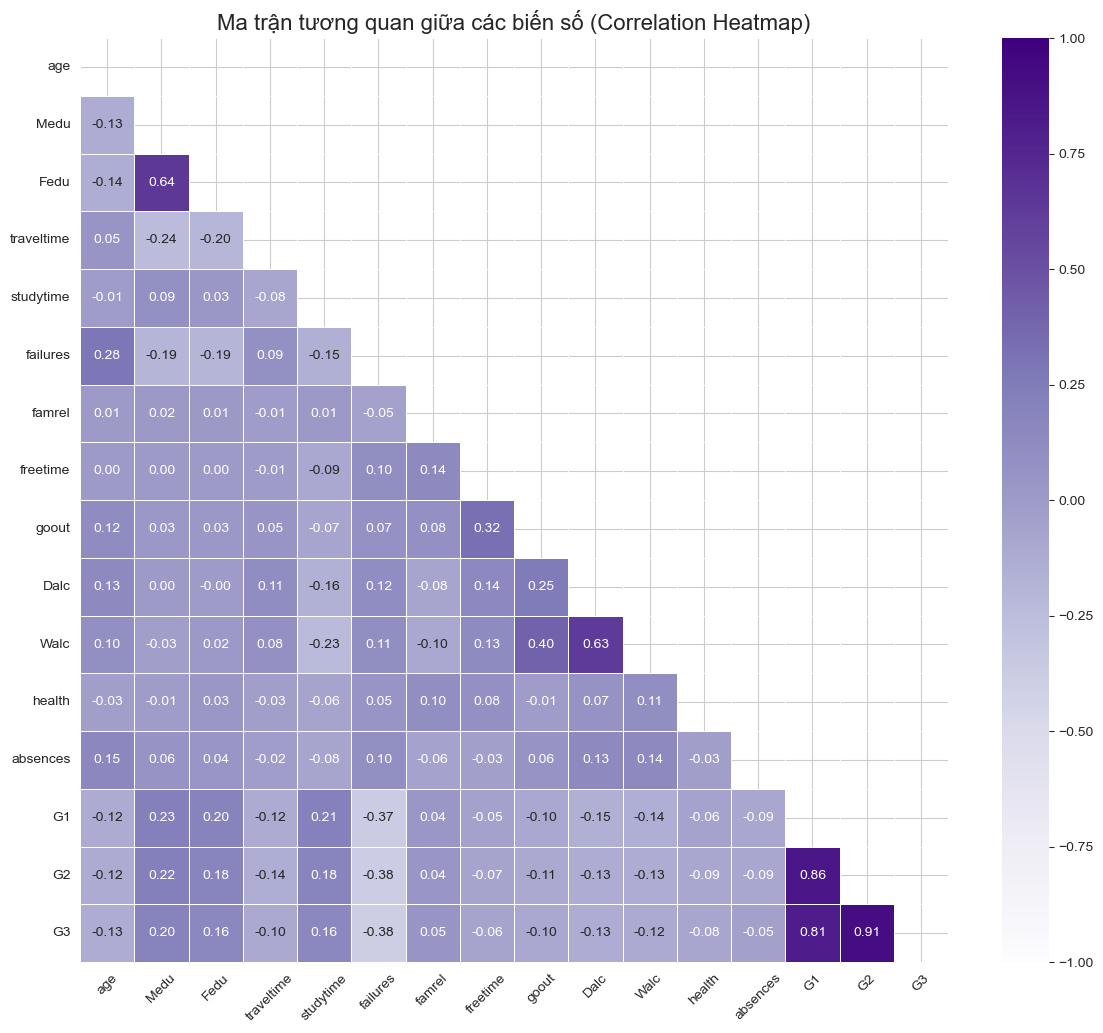


--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH (|corr| > 0.5) ---
- G2 vs G3: 0.91
- G1 vs G2: 0.86
- G1 vs G3: 0.81
- Fedu vs Medu: 0.64
- Dalc vs Walc: 0.63


In [16]:
''' 
Preliminary Patterns:
• Calculate correlation matrix for numerical variables
• Create correlation heatmap
• Identify strongly correlated pairs (positive or negative)
• Are there any surprising relationships?
'''
print("--- PHÂN TÍCH TƯƠNG QUAN (CORRELATION ANALYSIS) ---")

# 1. Tính ma trận tương quan (Correlation Matrix)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# 2. Vẽ Heatmap (Biểu đồ nhiệt)
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Che một nửa tam giác trên để đỡ rối
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='Purples', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số (Correlation Heatmap)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 3. Xác định các cặp tương quan mạnh (Strongly Correlated Pairs)
print("\n--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH (|corr| > 0.5) ---")

# Làm phẳng ma trận và sắp xếp
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Lọc bỏ tương quan với chính nó (=1) và các cặp trùng lặp
strong_pairs = sorted_pairs[sorted_pairs != 1.0]
# Chỉ lấy các cặp có độ lớn tương quan > 0.5
strong_pairs = strong_pairs[abs(strong_pairs) > 0.5]
# Loại bỏ các cặp trùng lặp (ví dụ A-B và B-A) -> Chỉ giữ lại mỗi cặp 1 lần
strong_pairs = strong_pairs[~strong_pairs.index.duplicated(keep='first')]
# Lọc thủ công để tránh trùng lặp do unstack (A,B) vs (B,A)
seen = set()
unique_strong_pairs = {}
for idx, val in strong_pairs.items():
    pair = tuple(sorted(idx))
    if pair not in seen:
        seen.add(pair)
        unique_strong_pairs[pair] = val

# In kết quả
if not unique_strong_pairs:
    print("Không có cặp nào có tương quan mạnh trên 0.5 (ngoại trừ các cột điểm số).")
else:
    for (var1, var2), corr_val in unique_strong_pairs.items():
        print(f"- {var1} vs {var2}: {corr_val:.2f}")


**NHẬN XÉT**

1. Tương quan mạnh nhất: Giữa các cột điểm `G1`, `G2`, `G3` (0.80 - 0.91). -> Kết quả học tập có tính ổn định cao.
2. Tương quan gia đình: Trình độ học vấn của Mẹ (`Medu`) và Cha (`Fedu`) tương quan khá cao (0.64).
3. Tương quan thói quen: Uống rượu ngày thường (`Dalc`) và cuối tuần (`Walc`) đi cùng nhau (0.63).
4. Mối quan hệ bất ngờ (Surprising):
   - `failures` (rớt môn) có tương quan ÂM với G3 (khoảng -0.3 đến -0.4). Rớt càng nhiều, điểm càng thấp -> Hợp lý.
   - `studytime` (thời gian học) có tương quan dương yếu với điểm số, nhưng không mạnh như mong đợi.
   - `absences` (vắng mặt) gần như KHÔNG tương quan với điểm số (gần 0). -> Vắng nhiều chưa chắc đã học kém.

--- PHÂN TÍCH BẢNG CHÉO & THỐNG KÊ NHÓM (CROSS-TABULATIONS) ---

1. QUAN HỆ GIỮA CÁC BIẾN PHÂN LOẠI (CAT x CAT)
Các cột phân loại: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Sẽ phân tích 18 cột với biến mục tiêu Pass_Status

=== TỶ LỆ PASS/FAIL THEO CÁC BIẾN PHÂN LOẠI ===
   Chi-square p-value: 0.4787 -> Không có ý nghĩa thống kê
   Chi-square p-value: 0.0215 -> Có ý nghĩa thống kê
   Chi-square p-value: 0.1436 -> Không có ý nghĩa thống kê
   Chi-square p-value: 0.4614 -> Không có ý nghĩa thống kê
   Chi-square p-value: 0.0000 -> Có ý nghĩa thống kê
   Chi-square p-value: 0.0744 -> Không có ý nghĩa thống kê
   Chi-square p-value: 0.0139 -> Có ý nghĩa thống kê


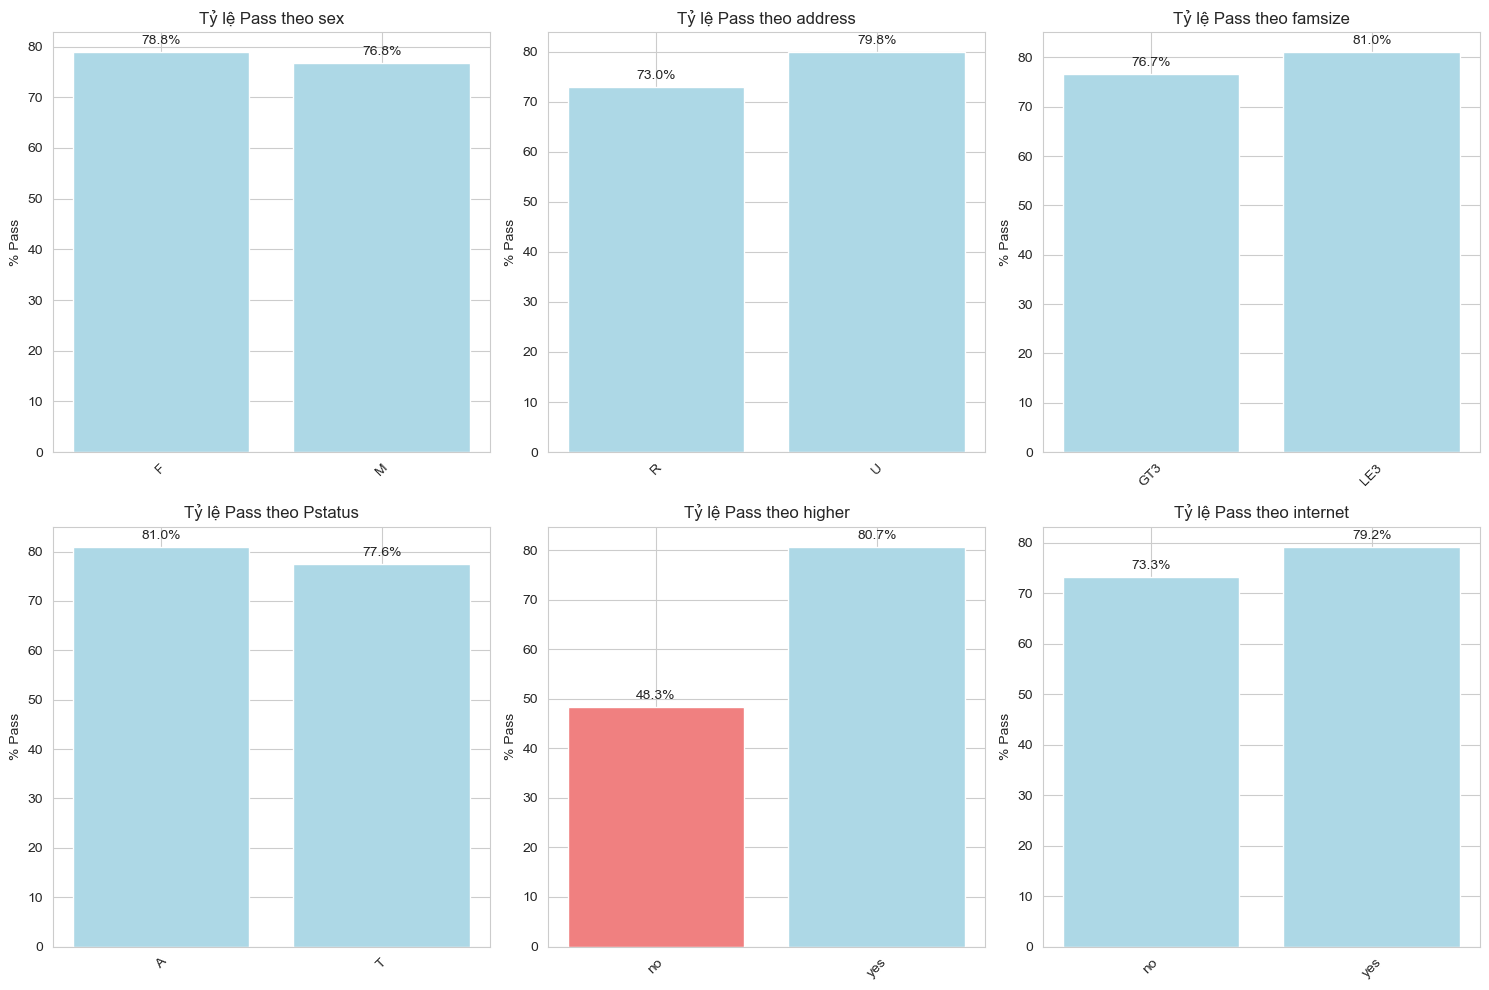

In [ ]:
''' 
Cross-tabulations:
• For important categorical × categorical combinations, create frequency tables
• For numerical × categorical combinations, create grouped summary statistics
'''
print("QUAN HỆ GIỮA CÁC BIẾN PHÂN LOẠI (CAT x CAT)")

# Tạo biến 'Pass' (Đậu/Rớt) để phân tích dễ hơn (G3 >= 10 là Đậu theo thang điểm Bồ Đào Nha)
df['Pass_Status'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

# Lấy danh sách các cột categorical (không bao gồm Pass_Status vừa tạo)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Pass_Status']

print(f"Các cột phân loại: {cat_cols}")
print(f"Sẽ phân tích {len(cat_cols)} cột với biến mục tiêu Pass_Status")

# Phân tích tỷ lệ Pass/Fail cho TẤT CẢ các cột categorical quan trọng
important_cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'higher', 'internet', 'romantic']

print("\n=== TỶ LỆ PASS/FAIL THEO CÁC BIẾN PHÂN LOẠI ===")

for col in important_cat_cols:
    if col in df.columns:
        ct_table = pd.crosstab(df[col], df['Pass_Status'], normalize='index') * 100
        
        # Tính chi-square test để xem có significant không
        from scipy.stats import chi2_contingency
        chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df[col], df['Pass_Status']))
        significance = "Có ý nghĩa thống kê" if p_value < 0.05 else "Không có ý nghĩa thống kê"
        print(f"   Chi-square p-value: {p_value:.4f} -> {significance}")

# Trực quan hóa các mối quan hệ categorical quan trọng
plt.figure(figsize=(15, 10))

for i, col in enumerate(important_cat_cols[:6]):  # Chỉ vẽ 6 cái đầu
    if col in df.columns:
        plt.subplot(2, 3, i + 1)
        
        # Tính tỷ lệ pass cho mỗi nhóm
        pass_rates = df.groupby(col)['Pass_Status'].apply(lambda x: (x == 'Pass').mean() * 100)
        
        # Vẽ bar chart
        bars = plt.bar(pass_rates.index, pass_rates.values, 
                      color=['lightcoral' if rate < 70 else 'lightblue' for rate in pass_rates.values])
        
        plt.title(f'Tỷ lệ Pass theo {col}')
        plt.ylabel('% Pass')
        plt.xticks(rotation=45)
        
        # Thêm số liệu trên cột
        for bar, rate in zip(bars, pass_rates.values):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1, 
                    f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [ ]:
# • For numerical × categorical combinations, create grouped summary statistics
# Chọn các cột phân loại quan trọng để phân tích với các biến số
cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'higher', 'internet', 'romantic']
# Xem với các biến số quan trọng
numeric_cols = ['G3', 'studytime', 'failures']
print("THỐNG KÊ NHÓM GIỮA BIẾN SỐ VÀ PHÂN LOẠI (NUMERIC x CAT)")
for cat_col in cat_cols:
    print(f"\n--- Phân tích theo nhóm cho cột phân loại: {cat_col} ---")
    grouped_stats = df.groupby(cat_col)[numeric_cols].agg(['min','max','mean', 'median', 'std'])
    # Hiển thị bảng thống kê nhóm cứ 3 numeric một lần để tránh quá dài
    for i in range(0, len(numeric_cols), 3):
        display(grouped_stats[numeric_cols[i:i+3]])



THỐNG KÊ NHÓM GIỮA BIẾN SỐ VÀ PHÂN LOẠI (NUMERIC x CAT)

--- Phân tích theo nhóm cho cột phân loại: sex ---


G3                                 studytime                       \
    min max       mean median       std       min max      mean median   
sex                                                                      
F     0  19  11.448393   12.0  3.874334         1   4  2.145516    2.0   
M     0  20  11.203091   11.0  3.852167         1   4  1.741722    2.0   

              failures                                 
          std      min max      mean median       std  
sex                                                    
F    0.804106        0   3  0.226734    0.0  0.590343  
M    0.818456        0   3  0.313466    0.0  0.730934


--- Phân tích theo nhóm cho cột phân loại: address ---


G3                                 studytime                       \
        min max       mean median       std       min max      mean median   
address                                                                      
R         0  19  10.600000   11.0  3.982532         1   4  1.919298    2.0   
U         0  20  11.620553   12.0  3.784903         1   4  1.989460    2.0   

                  failures                                 
              std      min max      mean median       std  
address                                                    
R        0.874409        0   3  0.329825    0.0  0.704604  
U        0.818580        0   3  0.239789    0.0  0.635741


--- Phân tích theo nhóm cho cột phân loại: famsize ---


G3                                 studytime                       \
        min max       mean median       std       min max      mean median   
famsize                                                                      
GT3       0  20  11.189702   11.0  3.998548         1   4  1.989160    2.0   
LE3       0  19  11.709150   12.0  3.500405         1   4  1.924837    2.0   

                  failures                                 
              std      min max      mean median       std  
famsize                                                    
GT3      0.841522        0   3  0.283198    0.0  0.683009  
LE3      0.816372        0   3  0.218954    0.0  0.584864


--- Phân tích theo nhóm cho cột phân loại: Pstatus ---


G3                                 studytime                       \
        min max       mean median       std       min max      mean median   
Pstatus                                                                      
A         0  19  11.669421   11.0  3.617984         1   4  1.958678    2.0   
T         0  20  11.299025   11.0  3.895805         1   4  1.971831    2.0   

                  failures                                 
              std      min max      mean median       std  
Pstatus                                                    
A        0.734809        0   3  0.272727    0.0  0.683130  
T        0.846883        0   3  0.263272    0.0  0.652897


--- Phân tích theo nhóm cho cột phân loại: higher ---


G3                                 studytime                       \
       min max       mean median       std       min max      mean median   
higher                                                                      
no       0  14   8.348315    9.0  3.545487         1   4  1.460674    1.0   
yes      0  20  11.620942   12.0  3.775789         1   4  2.017801    2.0   

                 failures                                 
             std      min max      mean median       std  
higher                                                    
no      0.691773        0   3  0.876404    1.0  1.053352  
yes     0.830938        0   3  0.207330    0.0  0.574574


--- Phân tích theo nhóm cho cột phân loại: internet ---


G3                                 studytime                       \
         min max       mean median       std       min max      mean median   
internet                                                                      
no         0  19  10.534562   11.0  3.855006         1   4  1.889401    2.0   
yes        0  20  11.553809   12.0  3.841653         1   4  1.991536    2.0   

                   failures                                 
               std      min max      mean median       std  
internet                                                    
no        0.808936        0   3  0.359447    0.0  0.769689  
yes       0.840083        0   3  0.239420    0.0  0.621054


--- Phân tích theo nhóm cho cột phân loại: romantic ---


G3                                 studytime                       \
         min max       mean median       std       min max      mean median   
romantic                                                                      
no         0  20  11.624071   12.0  3.659196         1   4  1.946508    2.0   
yes        0  18  10.830189   11.0  4.168836         1   4  2.013477    2.0   

                   failures                                 
               std      min max      mean median       std  
romantic                                                    
no        0.866089        0   3  0.227340    0.0  0.622276  
yes       0.772732        0   3  0.331536    0.0  0.709436

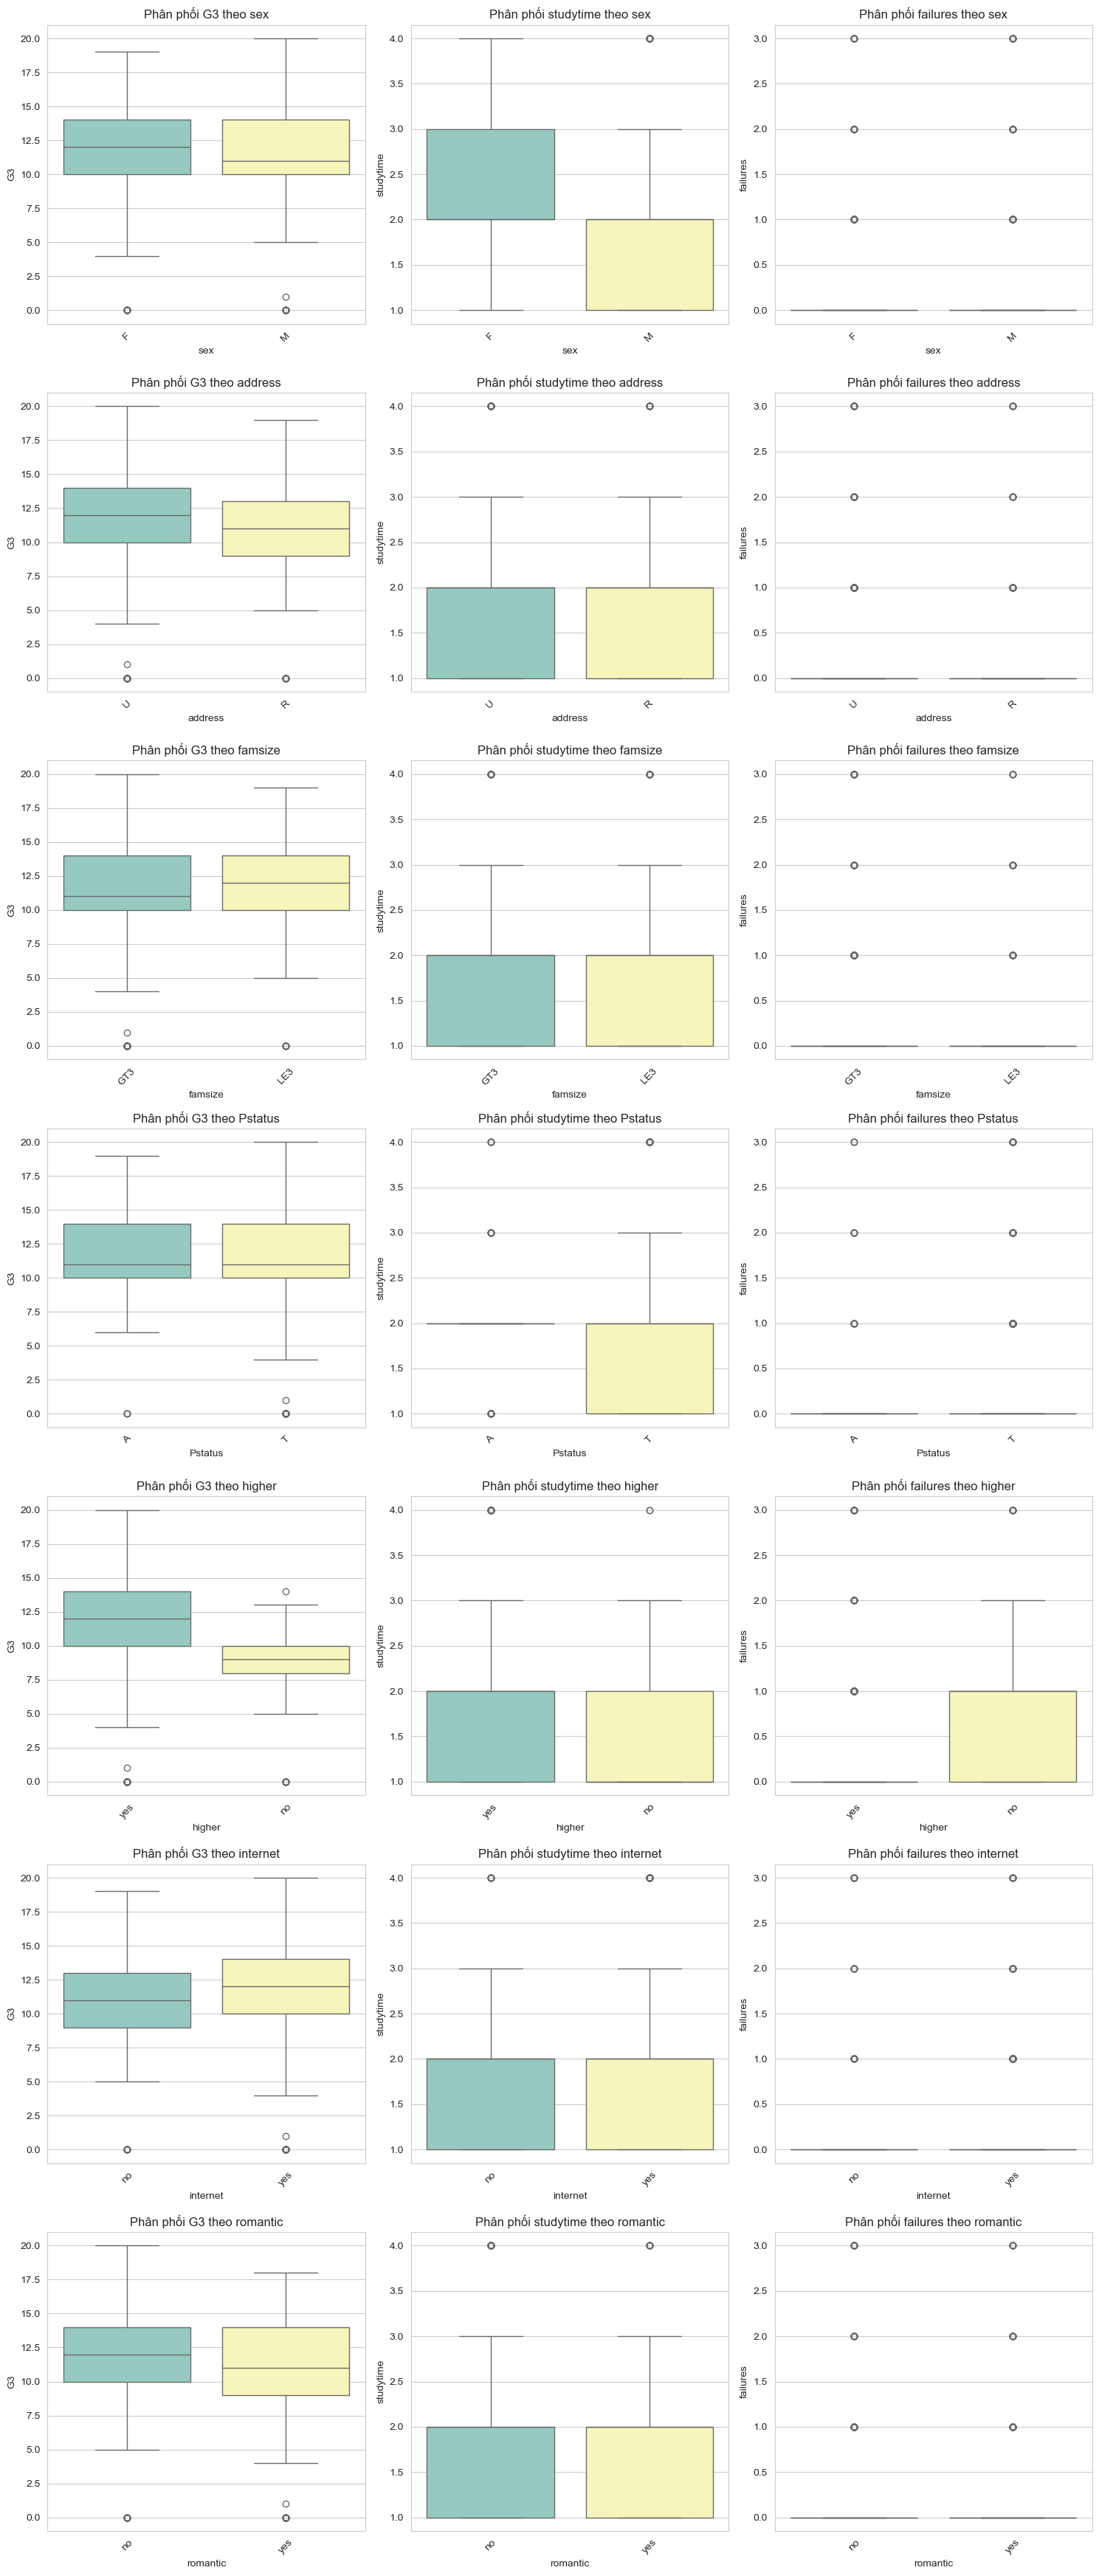

In [ ]:
# Trực quan hóa phân phối biến số theo các biến phân loại (Box Plots)
plt.figure(figsize=(15, 5 * len(cat_cols)))
for i, cat_col in enumerate(cat_cols):
    for j, num_col in enumerate(numeric_cols):
        plt.subplot(len(cat_cols), len(numeric_cols), i * len(numeric_cols) + j + 1)
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set3', legend=False, hue=cat_col)
        plt.title(f'Phân phối {num_col} theo {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()